In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import string  
from sklearn import svm

from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud
from fractions import Fraction
import re

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wang1090\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wang1090\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wang1090\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [2]:
reviews = pd.read_json('reviews_Video_Games.json',lines=True)
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AB9S9279OZ3QO,0078764343,Alan,"[1, 1]",I haven't gotten around to playing the campaig...,5,Good game and Beta access!!,1373155200,"07 7, 2013"
1,A24SSUT5CSW8BH,0078764343,Kindle Customer,"[0, 0]",I want to start off by saying I have never pla...,5,Love the game,1377302400,"08 24, 2013"
2,AK3V0HEBJMQ7J,0078764343,"Miss Kris ""Krissy""","[0, 0]",this will be my second medal of honor I love h...,4,MOH nice,1372896000,"07 4, 2013"
3,A10BECPH7W8HM7,043933702X,"GMC ""Old Time Modeler""","[0, 0]","great game when it first came out, and still a...",5,Five Stars,1404950400,"07 10, 2014"
4,A2PRV9OULX1TWP,043933702X,grimi,"[0, 0]",this is the first need for speed I bought year...,5,memory lane,1386115200,"12 4, 2013"


In [3]:
reviews[['helpful_n','helpful_d']]=pd.DataFrame(reviews.helpful.values.tolist(),index=reviews.index)

In [4]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_n,helpful_d
0,AB9S9279OZ3QO,0078764343,Alan,"[1, 1]",I haven't gotten around to playing the campaig...,5,Good game and Beta access!!,1373155200,"07 7, 2013",1,1
1,A24SSUT5CSW8BH,0078764343,Kindle Customer,"[0, 0]",I want to start off by saying I have never pla...,5,Love the game,1377302400,"08 24, 2013",0,0
2,AK3V0HEBJMQ7J,0078764343,"Miss Kris ""Krissy""","[0, 0]",this will be my second medal of honor I love h...,4,MOH nice,1372896000,"07 4, 2013",0,0
3,A10BECPH7W8HM7,043933702X,"GMC ""Old Time Modeler""","[0, 0]","great game when it first came out, and still a...",5,Five Stars,1404950400,"07 10, 2014",0,0
4,A2PRV9OULX1TWP,043933702X,grimi,"[0, 0]",this is the first need for speed I bought year...,5,memory lane,1386115200,"12 4, 2013",0,0


In [5]:
reviews.drop_duplicates(subset=['reviewerID','asin','unixReviewTime'],inplace=True)
reviews['helpful_percentage']=np.where(reviews['helpful_d']>0,reviews['helpful_n']/reviews['helpful_d'],-1)
reviews['helpful_range']=pd.cut(reviews['helpful_percentage'],bins=[-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0],labels=['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
reviews['id']=reviews.index
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_n,helpful_d,helpful_percentage,helpful_range,id
0,AB9S9279OZ3QO,0078764343,Alan,"[1, 1]",I haven't gotten around to playing the campaig...,5,Good game and Beta access!!,1373155200,"07 7, 2013",1,1,1.0,80-100%,0
1,A24SSUT5CSW8BH,0078764343,Kindle Customer,"[0, 0]",I want to start off by saying I have never pla...,5,Love the game,1377302400,"08 24, 2013",0,0,-1.0,Empty,1
2,AK3V0HEBJMQ7J,0078764343,"Miss Kris ""Krissy""","[0, 0]",this will be my second medal of honor I love h...,4,MOH nice,1372896000,"07 4, 2013",0,0,-1.0,Empty,2
3,A10BECPH7W8HM7,043933702X,"GMC ""Old Time Modeler""","[0, 0]","great game when it first came out, and still a...",5,Five Stars,1404950400,"07 10, 2014",0,0,-1.0,Empty,3
4,A2PRV9OULX1TWP,043933702X,grimi,"[0, 0]",this is the first need for speed I bought year...,5,memory lane,1386115200,"12 4, 2013",0,0,-1.0,Empty,4


In [28]:
df_new=reviews.groupby(['overall','helpful_range']).agg({'id':'count'})
df_new=df_new.unstack()
df_new.columns=df_new.columns.get_level_values(1)
df_new

helpful_range,Empty,0-20%,20-40%,40-60%,60-80%,80-100%
overall,,,,,,
1,54736,14151,16483,19412,18794,29264
2,34276,3621,6858,9498,8991,14269
3,66577,3222,7337,11754,11146,24334
4,154479,2923,7922,16719,15898,62319
5,453411,7801,19485,42018,37648,149407


In [36]:
df_new[df_new.columns[::-1]].T

overall,1,2,3,4,5
helpful_range,,,,,
80-100%,29264,14269,24334,62319,149407
60-80%,18794,8991,11146,15898,37648
40-60%,19412,9498,11754,16719,42018
20-40%,16483,6858,7337,7922,19485
0-20%,14151,3621,3222,2923,7801
Empty,54736,34276,66577,154479,453411


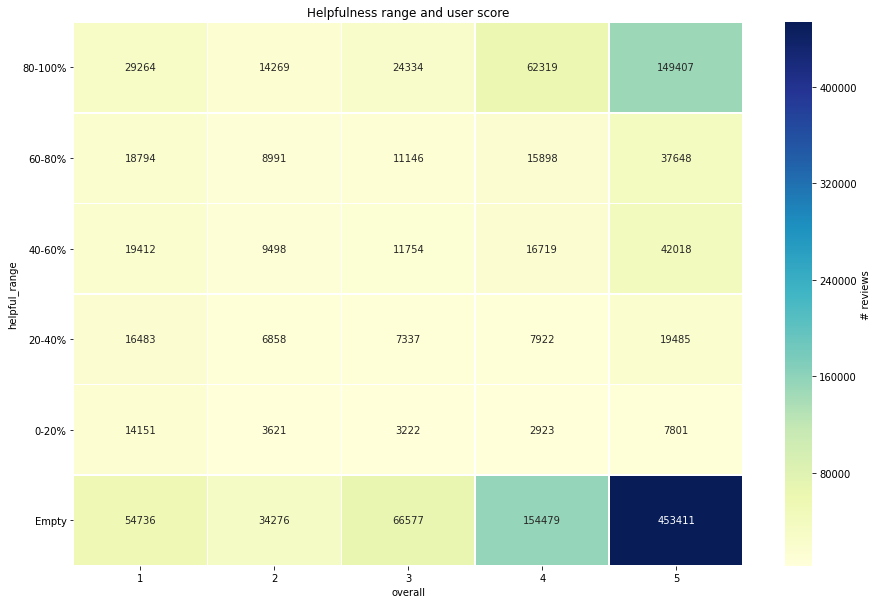

In [33]:
fig = plt.figure(figsize=(15,10))

sns.heatmap(df_new[df_new.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('Helpfulness range and user score')
plt.show()

In [37]:
df_nothree=reviews[reviews['overall']!=3]
X=df_nothree['reviewText']
y_dict={1:0, 2:0, 4:1, 5:1}
y=df_nothree['overall'].map(y_dict)

In [41]:
c=CountVectorizer(stop_words='english')
model_l=LogisticRegression()
X_cv=c.fit_transform(X)
print('features: {}'.format(X_cv.shape[1]))
X_train,X_test,y_train,y_test=train_test_split(X_cv,y,test_size=0.3,random_state=0)
print('train records: {}'.format(X_train.shape[0]))
print('test records: {}'.format(X_test.shape[0]))
clf=model_l.fit(X_train,y_train)
acc=clf.score(X_test,y_test)
print('Model Accuracy: {}'.format(acc))

features: 422247
train records: 840268
test records: 360115


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.9203782125154465


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [44]:
w=c.get_feature_names()
coef=clf.coef_.tolist()[0]
coef_df=pd.DataFrame({'Word':w,'Coefficient':coef})
coef_df=coef_df.sort_values(['Coefficient','Word'],ascending=[0,1])
print('Top 30 positive words')
print(coef_df.head(30).to_string(index=False))
print(' ')
print('Top 30 negative words')
print(coef_df.tail(30).to_string(index=False))

Top 30 positive words
       Word  Coefficient
  skeptical     2.219839
  addicting     2.066313
   excelent     2.061320
  addictive     2.025926
     haters     2.008936
 pleasantly     1.969017
  excelente     1.843403
 refreshing     1.739921
   exceeded     1.729134
  downsides     1.727235
   downside     1.726293
    coolest     1.699326
       haha     1.640754
      loves     1.636942
   hesitate     1.632001
 flawlessly     1.628052
    pleased     1.621735
      voila     1.607824
    regrets     1.592564
     gripes     1.540254
       buen     1.534686
     enjoys     1.533204
     awsome     1.493727
    funnest     1.485978
   argument     1.482861
     shines     1.480239
      quell     1.462834
    awesome     1.451545
        tad     1.432799
 phenomenal     1.412890
 
Top 30 negative words
           Word  Coefficient
          awful    -1.615324
        garbage    -1.618214
       horrible    -1.619401
    unenjoyable    -1.621449
  disapointment    -1.649180
     

In [48]:
tfidf=TfidfVectorizer(stop_words='english')
def model_run(X,y,word_model,model,coef_show=1):
    X_cv1=word_model.fit_transform(X)
    print('features: {}'.format(X_cv1.shape[1]))
    X_train,X_test,y_train,y_test=train_test_split(X_cv1,y,test_size=0.3,random_state=0)
    print('train records: {}'.format(X_train.shape[0]))
    print('test records: {}'.format(X_test.shape[0]))
    clf=model.fit(X_train,y_train)
    acc=clf.score(X_test,y_test)
    print('Model Accuracy: {}'.format(acc))
    
    if coef_show==1:
        w1=word_model.get_feature_names()
        coef1=clf.coef_.tolist()[0]
        coef_df=pd.DataFrame({'Word':w1,'Coefficient':coef1})
        coef_df=coef_df.sort_values(['Coefficient','Word'],ascending=[0,1])
        print('Top 30 positive words')
        print(coef_df.head(30).to_string(index=False))
        print(' ')
        print('Top 30 negative words')
        print(coef_df.tail(30).to_string(index=False))

In [49]:
model_run(X,y,tfidf,LogisticRegression())

features: 422247
train records: 840268
test records: 360115


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.9241686683420574
Top 30 positive words
       Word  Coefficient
      great    13.678372
       best    11.299190
    awesome    10.966474
       love    10.900918
    amazing    10.882365
    perfect     9.934785
  excellent     9.565053
  addictive     9.335809
  addicting     8.419685
      loves     8.172002
     highly     7.978046
  perfectly     7.879109
  fantastic     7.607055
  complaint     7.513623
      blast     7.277319
   downside     7.253414
        fun     7.095632
  skeptical     6.679184
   favorite     6.653011
    pleased     6.323973
 complaints     6.064180
      solid     6.059052
      rocks     6.008466
    worried     5.942034
      worry     5.938018
      helps     5.922453
 incredible     5.769399
     awsome     5.747981
 flawlessly     5.675768
  wonderful     5.558174
 
Top 30 negative words
           Word  Coefficient
       pathetic    -6.084679
           lame    -6.287320
          sucks    -6.316608
       unusable    -6.353739

In [50]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
model_run(X, y, tfidf_n, LogisticRegression())

features: 14581220
train records: 840268
test records: 360115


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.9288977132304959
Top 30 positive words
             Word  Coefficient
            great    22.198859
             best    18.250293
             love    18.216002
          awesome    17.257038
          amazing    16.403237
          perfect    15.419000
        excellent    14.365473
            loves    12.771728
              fun    11.398143
        addictive    11.393579
        perfectly    10.667905
        fantastic    10.595874
         favorite    10.220678
        complaint     9.888761
        addicting     9.564592
              bit     9.333664
            blast     9.180839
          pleased     9.093483
           highly     8.732899
             easy     8.721535
            solid     8.541865
            works     8.387216
 highly recommend     8.085953
         downside     8.077719
 won disappointed     8.056288
       definitely     8.040685
            happy     7.959895
             glad     7.903906
            helps     7.898879
       compla

In [51]:
df = df_nothree[df_nothree['overall'] == 5]
df = df[df['helpful_range'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
df.shape

(214341, 14)

In [52]:
X=df['reviewText']
y_dict={'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = df['helpful_range'].map(y_dict)

print('Class distribution:')
print(y.value_counts())

Class distribution:
1.0    187055
0.0     27286
Name: helpful_range, dtype: int64


In [54]:
df_s=pd.DataFrame(data=[X,y]).T
df_s.head()

,reviewText,helpful_range
0,I haven't gotten around to playing the campaig...,1
12,"Such fast shipping, games is such great condit...",1
15,My son who hates doing math loves to play this...,1
16,My seven year old has had a lot of fun with th...,1
32,I had this game as a kid in the 90s and played...,1


In [58]:
negative_records=len(df_s[df_s['helpful_range']==0])
negative_indices=np.array(df_s[df_s['helpful_range']==0].index)
negative_records

27286

In [56]:
positive_indices=df_s[df_s['helpful_range']==1].index
positive_indices

Int64Index([      0,      12,      15,      16,      32,      45,      56,
                 66,      76,      77,
            ...
            1324716, 1324720, 1324721, 1324722, 1324723, 1324725, 1324741,
            1324742, 1324745, 1324749],
           dtype='int64', length=187055)

In [59]:
random_positive_indices=np.random.choice(positive_indices,negative_records,replace=False)
random_positive_indices=np.array(random_positive_indices)
random_positive_indices

array([ 426616,  366087, 1214205, ...,  707665, 1042394,  861246],
      dtype=int64)

In [60]:
under_sample_indices=np.concatenate([negative_indices,random_positive_indices])

In [61]:
sample_data=df_s.loc[under_sample_indices,:]
X_u=sample_data['reviewText']
sample_data['helpful_range']=sample_data['helpful_range'].astype(int)
y_u=sample_data['helpful_range']

In [62]:
print("positive review percentage: ",len(sample_data[sample_data['helpful_range']==1])/len(sample_data))
print("negative review percentage: ",len(sample_data[sample_data['helpful_range']==0])/len(sample_data))
print("Total review number: ",len(sample_data))

positive review percentage:  0.5
negative review percentage:  0.5
Total review number:  54572


In [63]:
c = CountVectorizer(stop_words = 'english')

model_run(X_u, y_u, c, LogisticRegression())

features: 87801
train records: 38200
test records: 16372


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.6798192035182018
Top 30 positive words
          Word  Coefficient
         bingo     2.249250
        steady     1.822282
   comparisons     1.710500
   unstoppable     1.706987
         miles     1.577343
           oem     1.558674
 substantially     1.540843
       minions     1.479852
      combines     1.446704
         raved     1.435238
        syphon     1.404716
      vampires     1.397267
       penguin     1.374984
        taunts     1.374378
      employed     1.338925
       contain     1.334832
        ported     1.333189
        minion     1.331719
         risks     1.331424
    dictionary     1.328141
         genie     1.320728
    recognized     1.305275
  resurrection     1.304995
       proceed     1.302231
   communicate     1.293251
        resort     1.289874
      receives     1.287374
   differences     1.281422
       surfing     1.272062
         parry     1.259701
 
Top 30 negative words
       Word  Coefficient
   leappad2    -1.268183
 

In [65]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')

model_run(X_u, y_u, tfidf_n, LogisticRegression())

features: 1795571
train records: 38200
test records: 16372


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.7144515025653555
Top 30 positive words
        Word  Coefficient
     puzzles     4.324801
       music     3.955455
        easy     3.903031
       works     3.593302
       games     3.398489
         old     3.212589
      levels     3.063150
   recommend     2.882024
 controllers     2.830275
         fit     2.808938
       songs     2.717622
    year old     2.684372
   different     2.604325
         wii     2.572074
        case     2.550473
      kindle     2.521128
       price     2.520565
          ds     2.513637
 challenging     2.484374
         app     2.472413
       using     2.463101
      simple     2.440919
    keyboard     2.410059
    daughter     2.409487
      puzzle     2.379399
   difficult     2.365839
       cable     2.365146
     product     2.344076
        quot     2.321645
     workout     2.318439
 
Top 30 negative words
        Word  Coefficient
         pre    -2.055775
         cod    -2.060455
          ok    -2.126606
         

In [66]:
print("Negative vote 5 comments: ")
print(sample_data[sample_data['helpful_range']==0]['reviewText'].iloc[:100:20])
print("Positive vote 5 comments: ")
print(sample_data[sample_data['helpful_range']==1]['reviewText'].iloc[:100:20])

Negative vote 5 comments: 
86      I can&#8217;t stop playing my wife is going to...
1893    Ok, I just finished reading most of the review...
3209    One of the best games ever. A must get game. G...
3927    well it is took a great deal of thought but al...
6030    Sonic Heroes will be EXTREMELY AWESOME!!!!!!!!...
Name: reviewText, dtype: object
Positive vote 5 comments: 
426616     this game is the best to me and it got here re...
232434     I am totally addicted to this game! I cannot i...
1158885    If you want a strategy game for the 3DS, this ...
360317     Don't mind the garish review title, but this g...
167610     I played a demo of this game and it is alot of...
Name: reviewText, dtype: object


In [69]:
sample_data['word_count']=sample_data['reviewText'].apply(lambda x: len(x.split()))
sample_data['capital_count']=sample_data['reviewText'].apply(lambda x: sum(1 for c in x if c.isupper()))
sample_data['question_mark']=sample_data['reviewText'].apply(lambda x: sum(1 for c in x if c=='?'))
sample_data['exclamation_mark']=sample_data['reviewText'].apply(lambda x: sum(1 for c in x if c=='!'))
sample_data['punctuation']=sample_data['reviewText'].apply(lambda x: sum(1 for c in x if c in string.punctuation))

print(sample_data.groupby('helpful_range').agg({'word_count': 'mean', 'capital_count': 'mean', 'question_mark': 'mean', 'exclamation_mark': 'mean', 'punctuation': 'mean'}).T)

X_num = sample_data[sample_data.columns.difference(['helpful_range', 'reviewText'])]
y_num = sample_data['helpful_range']

helpful_range              0           1
word_count        105.661548  167.208495
capital_count      25.204574   28.503995
question_mark       0.189255    0.194129
exclamation_mark    1.491461    1.175218
punctuation        17.970901   28.416551


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, random_state=0)

clf_lr = LogisticRegression().fit(X_train, y_train)
acc_lr = clf_lr.score(X_test, y_test)
print('Logistic Regression accuracy: {}'.format(acc_lr))

clf_svm = svm.SVC().fit(X_train, y_train)
acc_svm = clf_svm.score(X_test, y_test)
print('SVM accuracy: {}'.format(acc_svm))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Logistic Regression accuracy: 0.5890200102616726
SVM accuracy: 0.554936597522539


In [76]:
df_user = reviews.groupby(['reviewerID']).agg({'overall':['count', 'mean']})
df_user.columns = df_user.columns.get_level_values(1)
df_user.columns = ['Rating count', 'Rating mean']
df_user = df_user.sort_values(by = 'Rating count', ascending = False)
print(df_user.head(10))

                Rating count  Rating mean
reviewerID                               
A3V6Z4RCDGRC44           880     4.256818
A3W4D8XOGLWUN5           817     3.620563
AJKWF4W7QD4NS            797     3.614806
A2QHS1ZCIQOL7E           521     3.614203
A2TCG2HV1VJP6V           474     4.059072
A29BQ6B90Y1R5F           429     4.156177
AFV2584U13XP3            338     4.514793
A20DZX38KRBIT8           320     3.287500
A74TA8X5YQ7NE            267     3.722846
A2582KMXLK2P06           263     3.463878


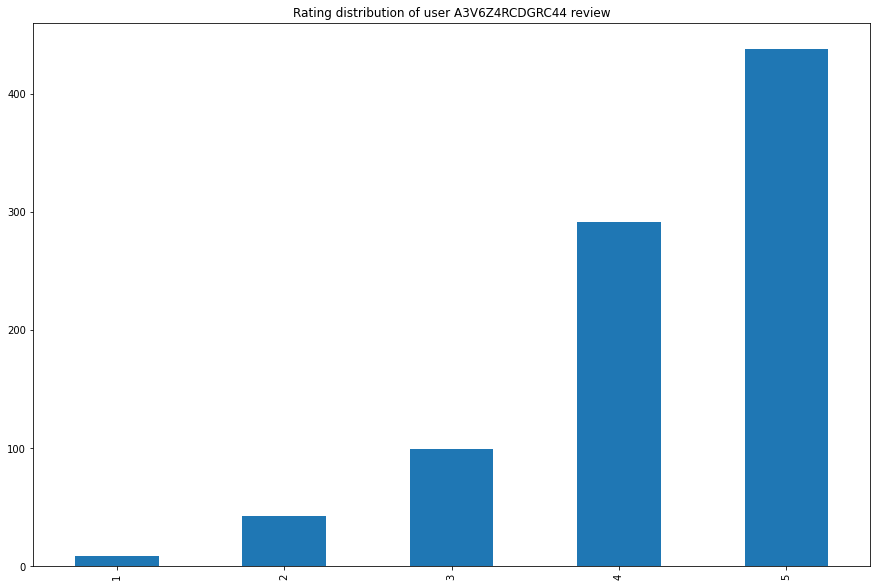

In [77]:
def plot_user(reviewerID):
    df_1user = reviews[reviews['reviewerID'] == reviewerID]['overall']
    df_1user_plot = df_1user.value_counts(sort=False)
    ax = df_1user_plot.plot(kind = 'bar', figsize = (15,10), title = 'Rating distribution of user {} review'.format(reviews[reviews['reviewerID'] == reviewerID]['reviewerID'].iloc[0]))
    plt.show()

plot_user('A3V6Z4RCDGRC44')

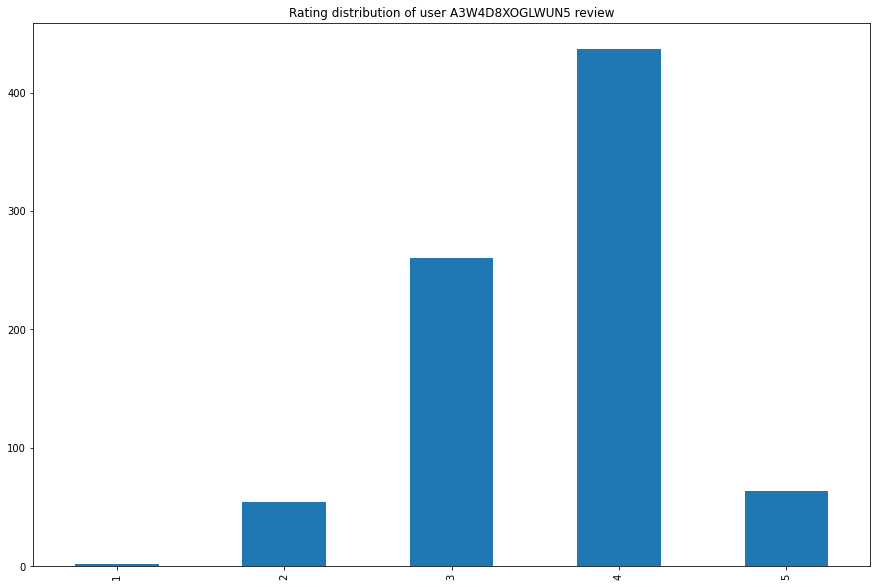

In [78]:
plot_user('A3W4D8XOGLWUN5')

In [79]:
print(df_user[(df_user['Rating mean']<3.5) & (df_user['Rating mean']>2.5)].head())

                Rating count  Rating mean
reviewerID                               
A20DZX38KRBIT8           320     3.287500
A2582KMXLK2P06           263     3.463878
ANAYSRE3LX8GZ            210     3.038095
A319SKSB556033           209     2.995215
A21GTH20R33D6B           191     2.712042


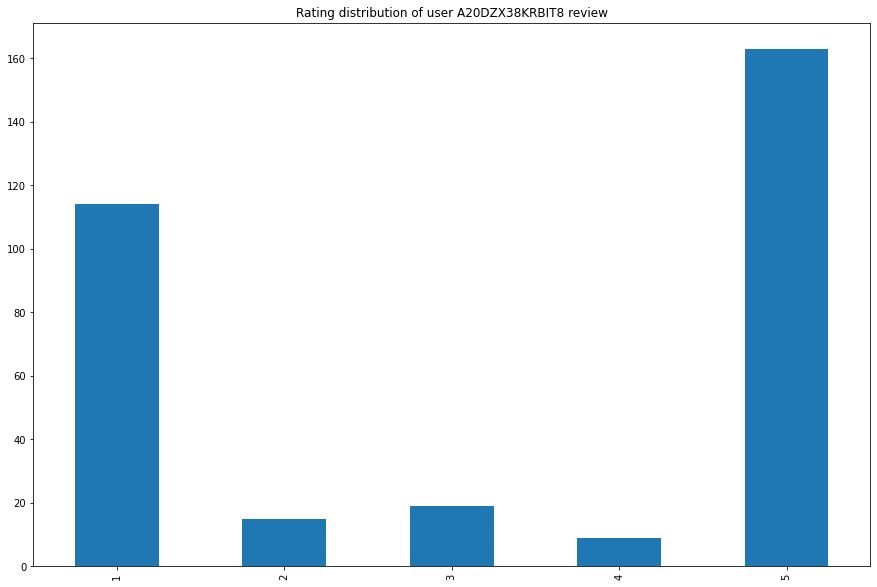

In [80]:
plot_user('A20DZX38KRBIT8')

In [14]:
def get_token_ngram(score,benchmark,userid='all'):
    if userid !='all':
        df=reviews[(reviews['reviewerID'] == userid) & (reviews['overall'] == score)]['reviewText']
    else:
        df=reviews[reviews['overall'] == score]['reviewText']
    count=len(df)
    total_text=' '.join(df)
    total_text=total_text.lower()
    stop=set(stopwords.words('english'))
    total_text=nltk.word_tokenize(total_text)
    total_text=[word for word in total_text if word not in stop and len(word)>=3]
    lemmatizer=WordNetLemmatizer()
    total_text=[lemmatizer.lemmatize(w,'v') for w in total_text]
    bigrams=ngrams(total_text,2)
    trigrams=ngrams(total_text,3)
    
    combine = chain(bigrams, trigrams)
    text = nltk.Text(combine)
    fdist = nltk.FreqDist(text)
    
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_ngram(j, 0.25, 'A2582KMXLK2P06')
    print('score {} reviews most popular 2-gram / 3-gram:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    #test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular 2-gram / 3-gram:
    Count  Occur %                  Phrase
0    28.0  116.67%        (mortal, kombat)
1    21.0    87.5%             (mega, man)
2    21.0    87.5%           (video, game)
3    17.0   70.83%         (wrestle, game)
4    14.0   58.33%             (game, n't)
5    12.0    50.0%          (mario, bros.)
6    12.0    50.0%             (war, zone)
7    11.0   45.83%          (super, mario)
8    11.0   45.83%          (tomb, raider)
9    11.0   45.83%   (super, mario, bros.)
10   10.0   41.67%             (n't, even)
11    9.0    37.5%        (wwf, war, zone)
12    9.0    37.5%              (wwf, war)
13    9.0    37.5%      (crash, bandicoot)
14    8.0   33.33%          (crappy, game)
15    8.0   33.33%            (game, like)
16    8.0   33.33%            (make, game)
17    8.0   33.33%            (load, time)
18    7.0   29.17%            (super, nes)
19    7.0   29.17%             (man, game)
20    7.0   29.17%           (really, bad)
21    7.

In [15]:
def get_token_adj(score, benchmark, userid='all'):
    
    if userid != 'all':
        df = reviews[(reviews['reviewerID'] == userid) & (reviews['overall'] == score)]['reviewText']
    else:
        df = reviews[reviews['overall'] == score]['reviewText']
        
    count = len(df)
    total_text = ' '.join(df)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'a') for w in total_text]
    # get adjective only
    total_text = [word for word, form in nltk.pos_tag(total_text) if form == 'JJ']
    
    text = nltk.Text(total_text)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark of his reviews
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])

In [17]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wang1090\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [19]:
# score 1-5 reviews with this user
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_adj(j, 0.25, 'A2582KMXLK2P06')
    print('score {} reviews most popular adjectives word:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular adjectives word:
    Count  Occur %      Phrase
0    37.0  154.17%         bad
1    34.0  141.67%        good
2    25.0  104.17%        many
3    24.0   100.0%        sega
4    21.0    87.5%      mortal
5    21.0    87.5%         big
6    18.0    75.0%         new
7    18.0    75.0%        mega
8    17.0   70.83%        easy
9    16.0   66.67%       first
10   14.0   58.33%        much
11   12.0    50.0%        able
12   12.0    50.0%    complete
13   12.0    50.0%       right
14   11.0   45.83%    horrible
15   10.0   41.67%       super
19    9.0    37.5%    original
21    9.0    37.5%       black
20    9.0    37.5%    previous
18    9.0    37.5%         old
17    9.0    37.5%       prime
16    9.0    37.5%      crappy
22    8.0   33.33%         wwf
23    8.0   33.33%        next
26    7.0   29.17%        tomb
27    7.0   29.17%        fish
28    7.0   29.17%   difficult
25    7.0   29.17%        slow
24    7.0   29.17%      actual
29    6.0    25.0%      